In [1]:
from compute_trajectory import compute_trajectory
from compute_loss_surface import compute_loss_surface

In [2]:
class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)

In [17]:
v = 5

In [4]:
### OLD

run = 'i002_50-blur'
proj = 'buffer'

args = {
    'debug': True,
    'seed': 0,
    'result_folder': f'results/{run}/trajectories',
    'statefile_folder': f'results/{run}/ckpt',
    'model': 'resnet56',
    'direction_file': f'results/{run}/{proj}.npy.npz',
    'projection_file': f'{proj}_proj.npz',
    'remove_skip_connections': False,
    'skip_bn_bias': True
}
args = Struct(**args)

compute_trajectory(args)

2022-02-10 20:49:57,641 Setting seed to 0
2022-02-10 20:49:57,685 using resnet56 with 853018 parameters
2022-02-10 20:49:57,687 Found 201 models
2022-02-10 20:50:05,486 Dot product is -5.0640664994716644e-09
2022-02-10 20:50:05,487 The directions are orthogonal
2022-02-10 20:50:05,534 Saving results
2022-02-10 20:50:05,536 xrange: -0.26794734597206116, 0.03994639217853546
2022-02-10 20:50:05,537 yrange: -0.11122974753379822, 0.14322437345981598


In [4]:
#### For PCA
run = 'i002_50-blur'
proj = 'pca_directions'

args = {
    'debug': True,
    'seed': 0,
    'result_folder': f'results/{run}/trajectories',
    'statefile_folder': f'results/{run}/ckpt',
    'model': 'resnet56',
    'direction_file': f'results/{run}/{proj}.npz',
    'projection_file': f'{proj}_proj.npz',
    'remove_skip_connections': False,
    'skip_bn_bias': True
}
args = Struct(**args)

compute_trajectory(args)

2022-02-16 01:58:50,210 Setting seed to 0
2022-02-16 01:58:50,261 using resnet56 with 853018 parameters
2022-02-16 01:58:50,263 Found 201 models
2022-02-16 01:58:54,789 Dot product is -4.190951585769653e-09
2022-02-16 01:58:54,790 The directions are orthogonal
2022-02-16 01:58:54,826 Saving results
2022-02-16 01:58:54,827 xrange: -6.7756757736206055, 58.602176666259766
2022-02-16 01:58:54,828 yrange: -31.946557998657227, 35.19713592529297


In [18]:
args = {
    'debug': True,
    'seed': 0,
    'batch_size': 1000,
    'result_folder': f'results/{run}/loss_surface_v{v}',
    'statefile': f'results/{run}/ckpt/200_model.pt',
    'model': 'resnet56',
    'surface_file': f'{proj}_loss_surface.npz',
    'direction_file': f'results/{run}/{proj}.npz',
    'device': 'cuda:0',
    'remove_skip_connections': False,
    'skip_bn_bias': True,
    'xcoords': '51:-20:62',
    'ycoords': '51:-35:35'
}
args = Struct(**args)

compute_loss_surface(args)

2022-02-16 02:11:53,056 Setting seed to 0


Files already downloaded and verified
Files already downloaded and verified


2022-02-16 02:11:54,596 using resnet56 with 853018 parameters
2022-02-16 02:11:54,597 Loading model from results/i002_50-blur/ckpt/200_model.pt
2022-02-16 02:11:54,645 Loading directions from results/i002_50-blur/pca_directions.npz
2022-02-16 02:11:54,664 x-range: -20.0:62.0:51
2022-02-16 02:11:54,665 y-range: -35.0:35.0:51
x: 62.0000, y: 35.0000, loss:5002593792.0000: 100%|██████████| 2601/2601 [1:23:11<00:00,  1.92s/it]
2022-02-16 03:35:06,380 Saving results


In [19]:
import argparse
import logging
import os

import numpy
from matplotlib import pyplot

In [20]:
args = {
    'debug': True,
    'result_folder': f'figures/{run}',
    'surface_file': f'results/{run}/loss_surface_v{v}/{proj}_loss_surface.npz',
    'trajectory_file': f'results/{run}/trajectories/{proj}_proj.npz',
    'plot_prefix': f'{run}_{proj}',
    'remove_skip_connections': False,
}
args = Struct(**args)
os.makedirs(f"{args.result_folder}", exist_ok=True)

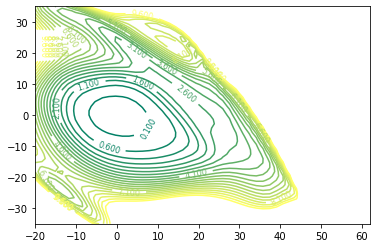

In [21]:
data = numpy.load(f"{args.surface_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
losses = data["losses"]
acc = data["accuracies"]

X, Y = numpy.meshgrid(xcoords, ycoords, indexing="ij")
Z = losses
fig = pyplot.figure()
CS = pyplot.contour(X, Y, Z, cmap='summer', levels=numpy.arange(0.1, 10, 0.5))
# CS = pyplot.contour(X, Y, Z, cmap='summer')

pyplot.clabel(CS, inline=1, fontsize=8)
fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_surface_2d_contour", dpi=300,
    bbox_inches='tight'
)
# pyplot.close()
pyplot.show()

2022-02-16 11:54:18,818 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f1d9fb85bb0>
2022-02-16 11:54:18,819 Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f1d9fb85bb0> on colorbar
2022-02-16 11:54:18,820 Setting pcolormesh


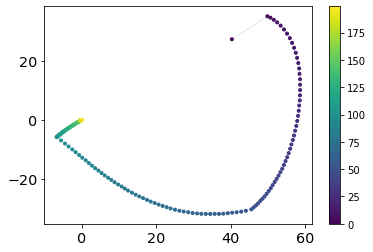

In [22]:
# create a 2D plot of trajectory
data = numpy.load(f"{args.trajectory_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]

fig = pyplot.figure()
pyplot.plot(xcoords, ycoords, linewidth=0.5, alpha=0.3)
pyplot.scatter(xcoords, ycoords, marker='.', c=numpy.arange(len(xcoords)))
pyplot.colorbar()
pyplot.tick_params('y', labelsize='x-large')
pyplot.tick_params('x', labelsize='x-large')

fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_trajectory_2d", dpi=300,
    bbox_inches='tight'
)
# pyplot.close()
pyplot.show()

2022-02-16 11:59:25,358 locator: <matplotlib.ticker.FixedLocator object at 0x7f1d9ef3af10>
2022-02-16 11:59:25,359 Using fixed locator on colorbar


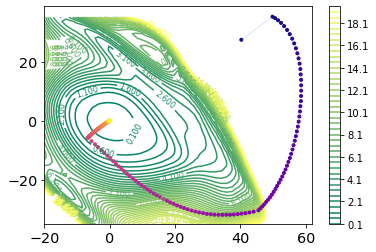

In [24]:
data = numpy.load(f"{args.surface_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
losses = data["losses"]
acc = data["accuracies"]

X, Y = numpy.meshgrid(xcoords, ycoords, indexing="ij")
Z = losses
fig = pyplot.figure()
CS = pyplot.contour(X, Y, Z, cmap='summer', levels=numpy.arange(0.1, 20, 0.5), zorder=1)
# CS = pyplot.contour(X, Y, Z, cmap='summer')

pyplot.clabel(CS, inline=1, fontsize=8)

data = numpy.load(f"{args.trajectory_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
pyplot.plot(xcoords, ycoords, linewidth=0.5, alpha=0.3)
pyplot.colorbar()
pyplot.scatter(xcoords, ycoords, marker='.', c=numpy.arange(len(xcoords)), cmap='plasma', zorder=3)
pyplot.tick_params('y', labelsize='x-large')
pyplot.tick_params('x', labelsize='x-large')

fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_trajectory+contour_2d", dpi=300,
    bbox_inches='tight'
)
pyplot.show()